In [383]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime


In [384]:
#For CSV files
inaData = pd.read_csv('ina219-2019-08-23-1566599161.csv').fillna(0)

In [385]:
print(inaData.shape)
inaData.head()

(3957, 3)


,mA,V,time
0,495.8,4.576,1.566599e+09
1,495.6,4.576,1.566599e+09
2,495.6,4.576,1.566599e+09
3,496.0,4.576,1.566599e+09
4,495.6,4.576,1.566599e+09


In [386]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [387]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [388]:
inaData.head()

,mA,V,watts,time
0,495.8,4.576,2.268781,1.566599e+09
1,495.6,4.576,2.267866,1.566599e+09
2,495.6,4.576,2.267866,1.566599e+09
3,496.0,4.576,2.269696,1.566599e+09
4,495.6,4.576,2.267866,1.566599e+09


In [389]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.221014479073519

In [390]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [391]:
print averagedINA.shape
averagedINA.head()

(259, 4)


,mA,V,watts,time
0,494.640000,4.576,2.263473,1.566599e+09
1,494.780000,4.576,2.264113,1.566599e+09
2,494.060000,4.576,2.260819,1.566599e+09
3,494.826667,4.576,2.264327,1.566599e+09
4,494.920000,4.576,2.264754,1.566599e+09


In [392]:
seleniumData = pd.read_csv('selenium-2019-08-23-1566599162.csv').fillna(0)


In [393]:
print(seleniumData.shape)
seleniumData.tail()

(144, 2)


,task,time
139,click,1.566599e+09
140,click,1.566599e+09
141,click,1.566599e+09
142,click,1.566599e+09
143,stop static 1,1.566599e+09


In [394]:
startTimeD1 = seleniumData.loc[seleniumData.loc[:,'task']=='start dynamic 0']
stopTimeD1 = seleniumData.loc[seleniumData.loc[:,'task']=='stop dynamic 0']

startTimeS1 = seleniumData.loc[seleniumData.loc[:,'task']=='start static 0']
stopTimeS1 = seleniumData.loc[seleniumData.loc[:,'task']=='stop static 0']

startTimeD2 = seleniumData.loc[seleniumData.loc[:,'task']=='start dynamic 1']
stopTimeD2 = seleniumData.loc[seleniumData.loc[:,'task']=='stop dynamic 1']

startTimeS2 = seleniumData.loc[seleniumData.loc[:,'task']=='start static 1']
stopTimeS2 = seleniumData.loc[seleniumData.loc[:,'task']=='stop static 1']

In [395]:
print startTimeD1
print stopTimeD1
print startTimeS1
print stopTimeS1
print startTimeD2
print stopTimeD2
print startTimeS2
print stopTimeS2

              task          time
0  start dynamic 0  1.566599e+09
              task          time
35  stop dynamic 0  1.566599e+09
              task          time
36  start static 0  1.566599e+09
             task          time
71  stop static 0  1.566599e+09
               task          time
72  start dynamic 1  1.566599e+09
               task          time
107  stop dynamic 1  1.566599e+09
               task          time
108  start static 1  1.566599e+09
              task          time
143  stop static 1  1.566599e+09


In [408]:
#make new data frame with power date from only test duration (+1 second before)
inaTestDataD1 = averagedINA.loc[(averagedINA.loc[:,'time']>=(startTimeD1.time[0]-1)) & (averagedINA.loc[:,'time']<=stopTimeD1.time[35])]
print(inaTestDataD1.shape)

#make new data frame with power date from only test duration
inaTestDataD2 = averagedINA.loc[(averagedINA.loc[:,'time']>=(startTimeD2.time[72]-1)) & (averagedINA.loc[:,'time']<=stopTimeD2.time[107])]
print(inaTestDataD2.shape)

(26, 4)
(26, 4)


In [418]:
#make new data frame with power date from only test duration (+ 1 second before)
inaTestDataS1 = averagedINA.loc[(averagedINA.loc[:,'time']>=(startTimeS1.time[36]-1)) & (averagedINA.loc[:,'time']<=stopTimeS1.time[71])]
print(inaTestDataS1.shape)

inaTestDataS2 = averagedINA.loc[(averagedINA.loc[:,'time']>=(startTimeS2.time[108]-1)) & (averagedINA.loc[:,'time']<=stopTimeS2.time[143])]
print(inaTestDataS2.shape)

(26, 4)
(25, 4)


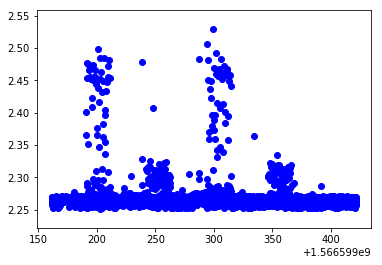

In [419]:

#graph all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


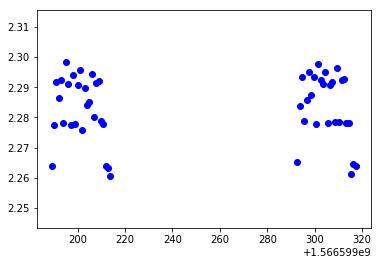

In [420]:
#graph dynamic data
plt.scatter(x=inaTestDataD1.loc[:,'time'], y=inaTestDataD1.loc[:,'watts'], color='b')
plt.scatter(x=inaTestDataD2.loc[:,'time'], y=inaTestDataD2.loc[:,'watts'], color='b')


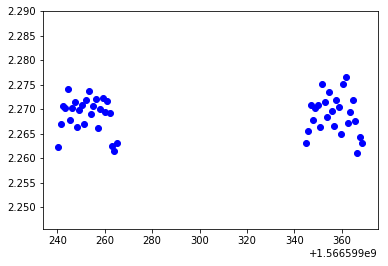

In [421]:
#graph static data
plt.scatter(x=inaTestDataS1.loc[:,'time'], y=inaTestDataS1.loc[:,'watts'], color='b')
plt.scatter(x=inaTestDataS2.loc[:,'time'], y=inaTestDataS2.loc[:,'watts'], color='b')


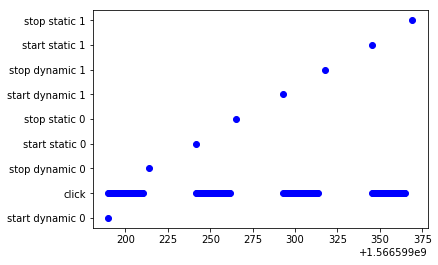

In [422]:

# a graph of volume of project start dates by year
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

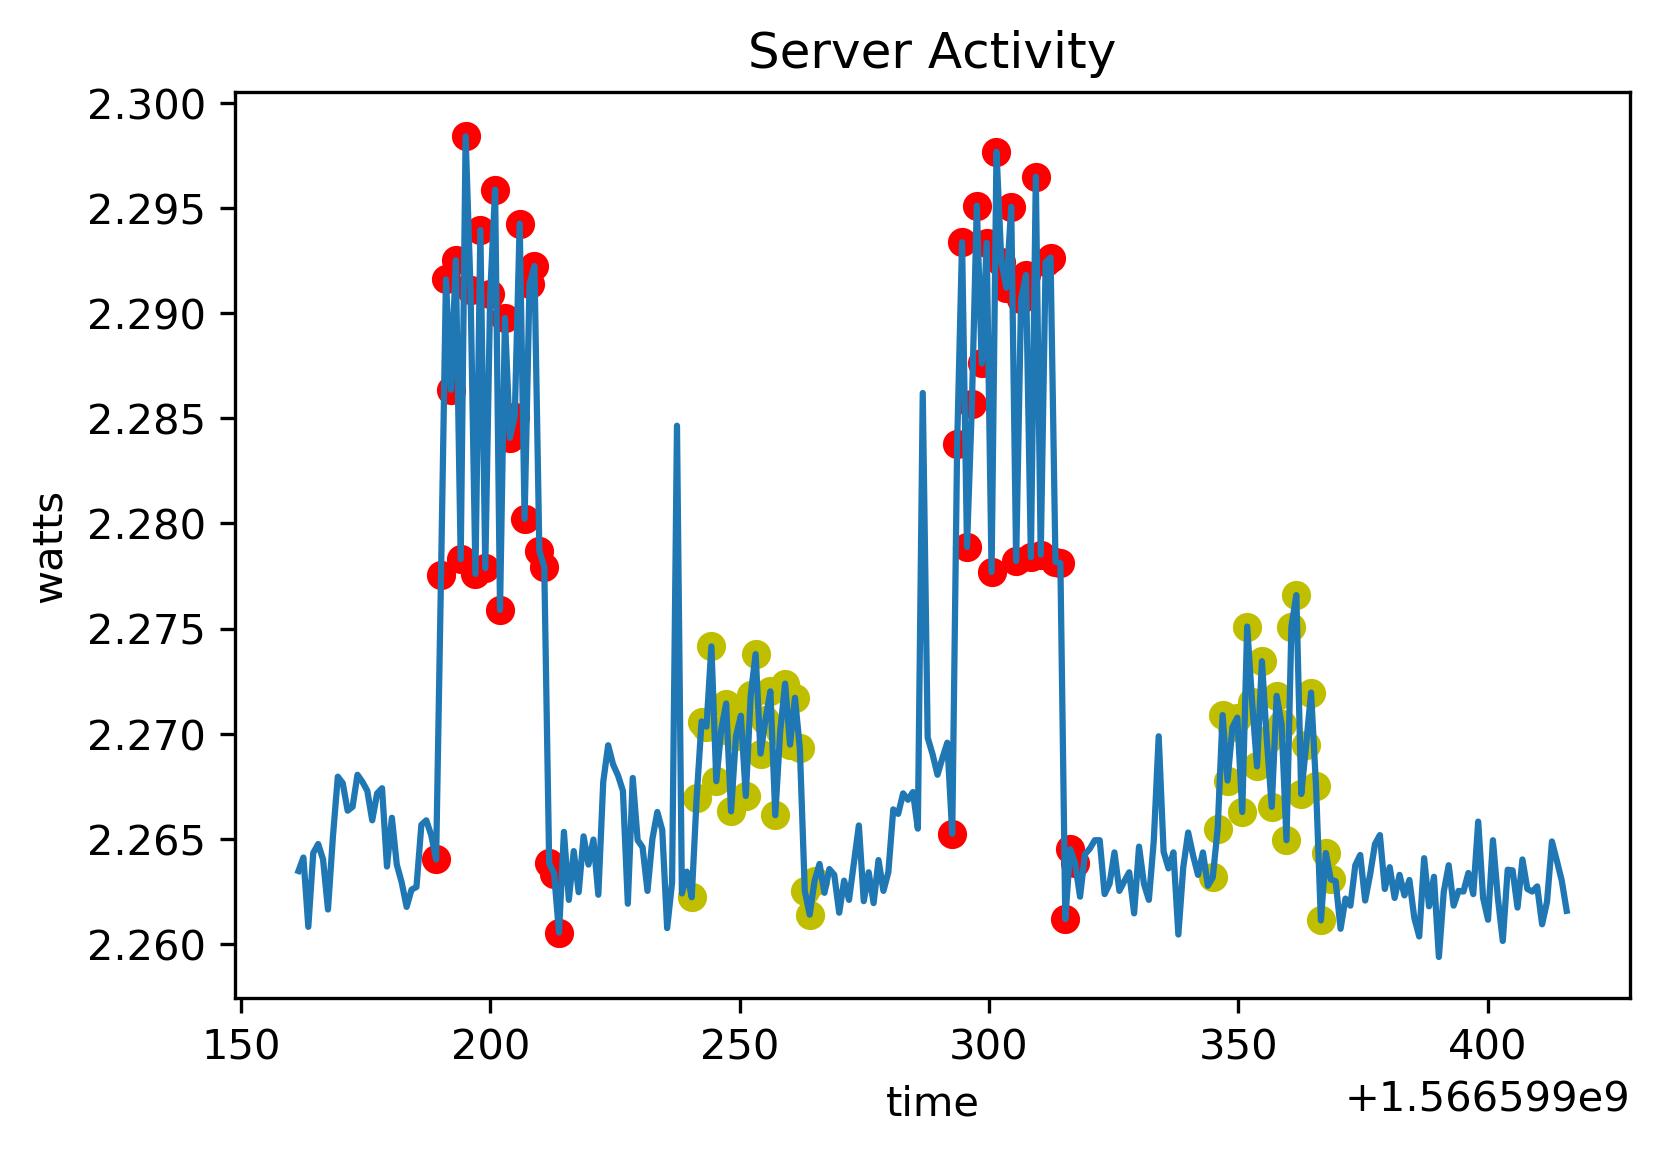

In [423]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='time', ylabel='watts',
       title='Server Activity')

ax.scatter(x=inaTestDataD1.loc[:,'time'], y=inaTestDataD1.loc[:,'watts'], color='r')
ax.scatter(x=inaTestDataS1.loc[:,'time'], y=inaTestDataS1.loc[:,'watts'], color='y')

ax.scatter(x=inaTestDataD2.loc[:,'time'], y=inaTestDataD2.loc[:,'watts'], color='r')
ax.scatter(x=inaTestDataS2.loc[:,'time'], y=inaTestDataS2.loc[:,'watts'], color='y')

#ax.grid()

fig.savefig("aggregatoroutput_aug23-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png")
plt.show()

In [424]:
overlayD1 = inaTestDataD1
#should this be normalized instead?
overlayD1.insert(4, 'scaled', overlayD1.time - overlayD1.time[overlayD1.time.index[0]], True)

overlayD2 = inaTestDataD2
#should this be normalized instead?
overlayD2.insert(4, 'scaled', overlayD2.time - overlayD2.time[overlayD2.time.index[0]], True)

overlayS1 = inaTestDataS1
#should this be normalized instead?
overlayS1.insert(4, 'scaled', overlayS1.time - overlayS1.time[overlayS1.time.index[0]], True)


overlayS2 = inaTestDataS2
#should this be normalized instead?
overlayS2.insert(4, 'scaled', overlayS2.time - overlayS2.time[overlayS2.time.index[0]], True)

In [425]:
overlayD2

,mA,V,watts,time,scaled,scaled
133,495.026667,4.576,2.265242,1.566599e+09,0.000000,0.000000
134,499.080000,4.576,2.283790,1.566599e+09,0.986028,0.986028
135,501.173333,4.576,2.293369,1.566599e+09,1.970835,1.970835
136,498.006667,4.576,2.278879,1.566599e+09,2.957527,2.957527
137,499.493333,4.576,2.285681,1.566599e+09,3.942886,3.942886
138,501.553333,4.576,2.295108,1.566599e+09,4.928218,4.928218
139,499.913333,4.576,2.287603,1.566599e+09,5.914466,5.914466
140,501.166667,4.576,2.293339,1.566599e+09,6.899932,6.899932
141,497.746667,4.576,2.277689,1.566599e+09,7.886139,7.886139
142,502.113333,4.576,2.297671,1.566599e+09,8.871255,8.871255


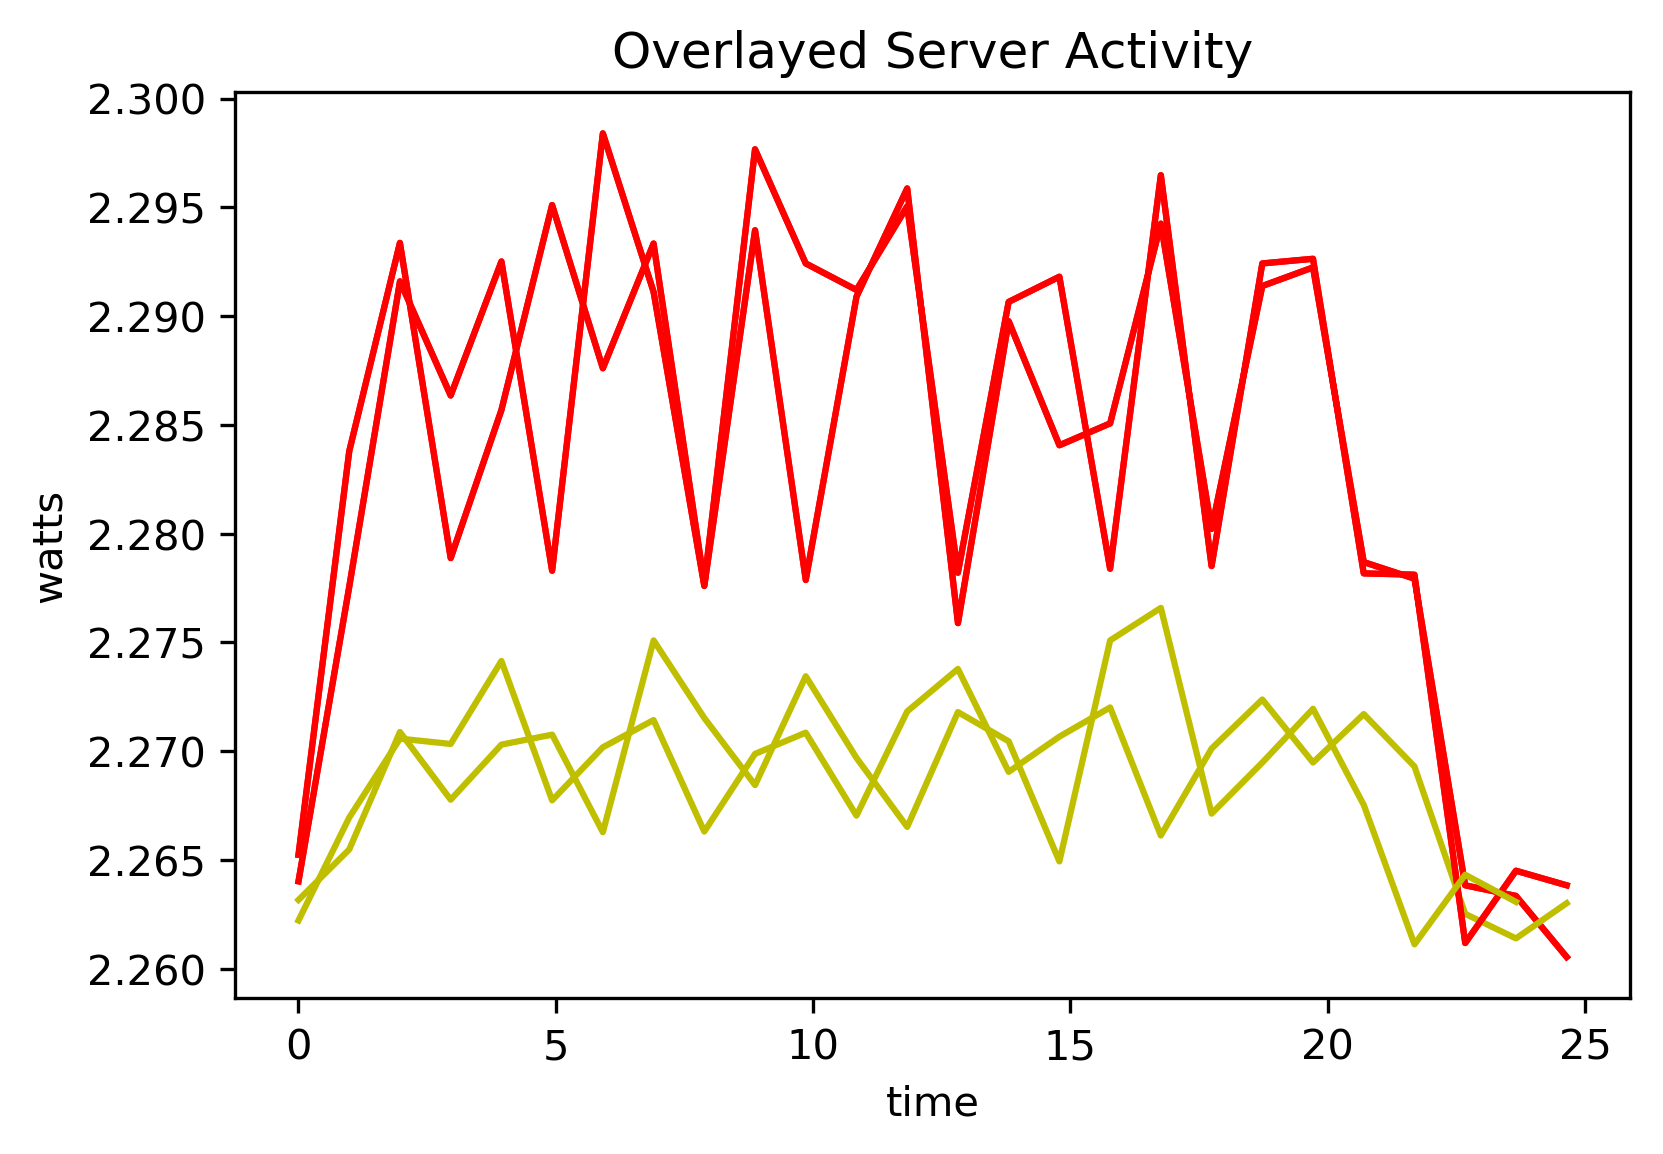

In [426]:
fig, ax = plt.subplots(dpi=300)

x = overlayD1.loc[:,'scaled']
y = overlayD1.loc[:,'watts']
ax.plot(x,y, color='r')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

ax.plot(overlayD2.loc[:,'scaled'], overlayD2.loc[:,'watts'], color='r')
ax.plot(overlayS2.loc[:,'scaled'], overlayS2.loc[:,'watts'], color='y')

#ax.grid()

fig.savefig("aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png")
plt.show()